In [1]:
!pip install whit-phys-util 1>/dev/null

In [2]:
import numpy as np
import scipy.constants
import math
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from scipy.special import comb
from scipy.optimize import curve_fit

In [3]:
repo = buc.local_repository("https://github.com/nyary-ben/Homework-5B")

Repository exists at this location. Pulling changes from GitHub.


# Homework 5B 5.42a)


* We know that $\frac{dP}{dT} = \frac{LP}{RT^2}$.
* As we rearrange for all T on one side and P on the other, we can integrate both sides and get $\ln{P} = -\frac{L}{RT}+C$.
* So $P = Ce^{-\frac{L}{RT}}$.

* I will use the data from the book on figure 11 to plot the graph and fit its best fit curve using the vapor pressure equation.

In [4]:
de1 = buc.DynamicDataEntry('H20 Phase data',['Temperature (degC)','VaP (bar)','L (kJ/mol)'],(0,3,1))
de1.edit_sheet()

DataGrid(auto_fit_columns=True, auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_render…

In [5]:
de1.save()

In [6]:
df = de1.get_dataframe()

In [7]:
def VaP(T,L,a):
    return a * np.exp(-L / (scipy.constants.R * T))
T = df['Temperature (degC)']+273
P = df['VaP (bar)']*100000
L = df['L (kJ/mol)']*1000

#def Le(T,P,a):
  #return (scipy.constants.R * T) * (np.log(a)- np.log(P))


VaPparam, cov = curve_fit(VaP, T, P)
Lparam, cov = curve_fit(VaP, T, L)

t_fit = np.linspace(273, 373, 200)
p_fit = VaP(t_fit, *VaPparam)
l_fit = VaP(t_fit, *Lparam)


df1 = pd.DataFrame({'Temperature (degC)': t_fit, 'VaP (Pa)': p_fit, 'L (j/mol)': l_fit})
selectedRows = [58,59,60,61,62]
df1.loc[selectedRows,:]


,Temperature (degC),VaP (Pa),L (j/mol)
58,302.145729,4140.220770,44784.101385
59,302.648241,4257.562136,44741.032024
60,303.150754,4377.823528,44698.146663
61,303.653266,4501.066899,44655.444147
62,304.155779,4627.355268,44612.923327


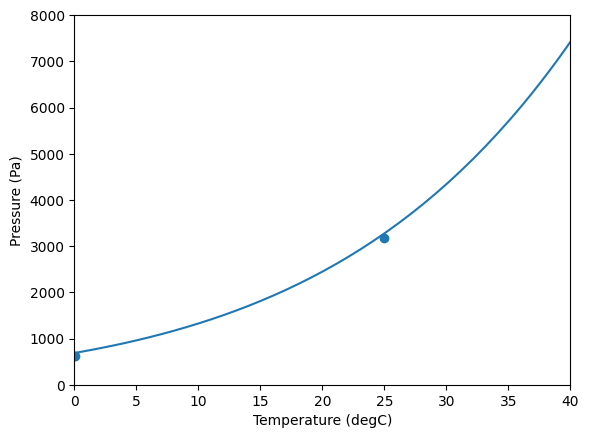

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['Temperature (degC)'],df['VaP (bar)']*100000)
t_fit = np.linspace(0, 100, 200)
ax.plot(t_fit, p_fit)
ax.set_xlabel('Temperature (degC)')
ax.set_ylabel('Pressure (Pa)')
ax.set_ylim(0,8000)
ax.set_xlim(0,40);